<a href="https://colab.research.google.com/github/MasterAleksandr/mnist/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Распознавание цифр по изображениям.


In [ ]:
import tensorflow as tf
print(tf.__version__)
from google.colab import drive
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

 #tf.enable_eager_execution()

2.12.0


####Вспомогательный код

In [ ]:
#@title
def show_mnist(images, labels, predicted_labels=None):
    plt.figure(figsize=(10,10))
    for i in range(16):
        plt.subplot(4,4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.gray)
        if predicted_labels is not None:
            title_obj = plt.title(f"Real: {labels[i]}. Pred: {predicted_labels[i]}")
            if labels[i] != predicted_labels[i]:
                plt.setp(title_obj, color='r')
        else:
            plt.title(f"Real label: {labels[i]}")

def show_progress(history: dict):
    plt.figure(figsize=(10, 5))
    ax1 = plt.subplot(1,2,1)
    plt.plot(history["accuracy"],label='train accuracy')
    plt.plot(history["val_accuracy"], label='test accuracy')
    ax2 = plt.subplot(1,2,2)
    plt.plot(history["loss"],label='train_loss')
    plt.plot(history["val_loss"],label='test_loss')

    ax1.legend(loc='best')
    ax2.legend(loc='best')
    plt.grid()
    plt.tight_layout()
    plt.show()

## Загрузка данных

11490434/11490434 [==============================] - 1s 0us/step


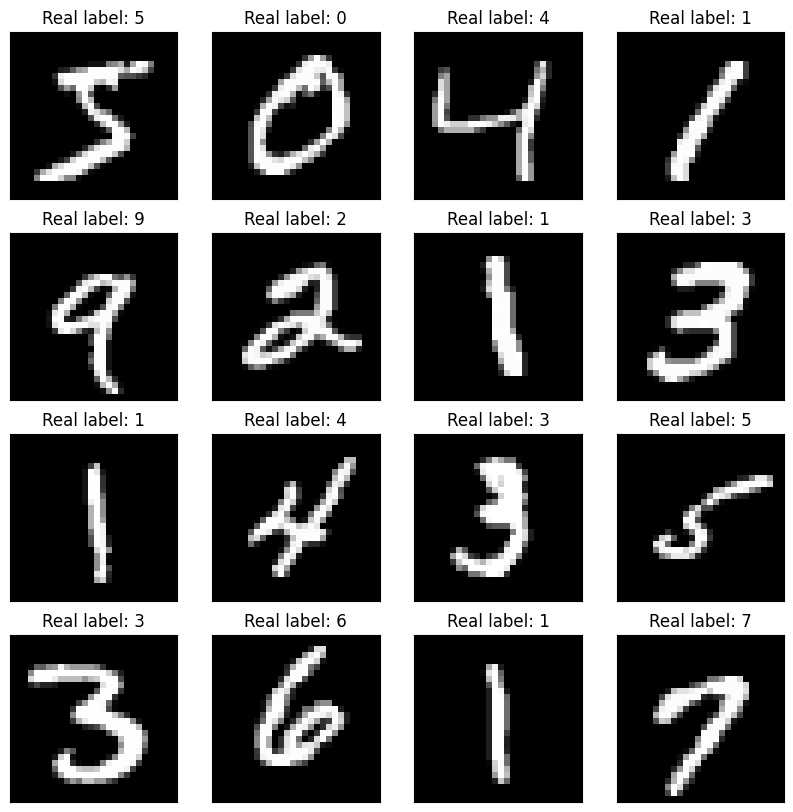

In [ ]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

show_mnist(x_train, y_train)
x_train = x_train.reshape((-1, 28*28)) # вытянули каждую картинку в вектор
x_test = x_test.reshape((-1, 28*28))


In [ ]:

drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
path = Path("/content/drive/My Drive/Skillbox/model_1")
path.mkdir(exist_ok=True, parents=True)
assert path.exists()
cpt_filename = "best_checkpoint.hdf5"
cpt_path =str(path / cpt_filename)

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(cpt_path, monitor='accuracy', verbose=1, save_best_only=True, mode='max')

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(cpt_path, monitor='accuracy', verbose=1, save_best_only=True, mode='min')
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(150, input_shape=(784,), activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
optimizer = tf.keras.optimizers.Adam()
loss = tf.keras.losses.sparse_categorical_crossentropy
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
history=model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), epochs=5, callbacks=[checkpoint])


Epoch 1/5
1860/1875 [============================>.] - ETA: 0s - loss: 0.2568 - accuracy: 0.9261
Epoch 1: accuracy improved from inf to 0.92642, saving model to /content/drive/My Drive/Skillbox/model_1/best_checkpoint.hdf5
1875/1875 [==============================] - 16s 5ms/step - loss: 0.2556 - accuracy: 0.9264 - val_loss: 0.1286 - val_accuracy: 0.9621
Epoch 2/5
1860/1875 [============================>.] - ETA: 0s - loss: 0.1108 - accuracy: 0.9670
Epoch 2: accuracy did not improve from 0.92642
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1103 - accuracy: 0.9671 - val_loss: 0.0926 - val_accuracy: 0.9723
Epoch 3/5
1862/1875 [============================>.] - ETA: 0s - loss: 0.0771 - accuracy: 0.9771
Epoch 3: accuracy did not improve from 0.92642
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0769 - accuracy: 0.9771 - val_loss: 0.0985 - val_accuracy: 0.9686
Epoch 4/5
1867/1875 [============================>.] - ETA: 0s - loss: 0.0569 - accuracy:

Давайте посмотрим на графики обучения:

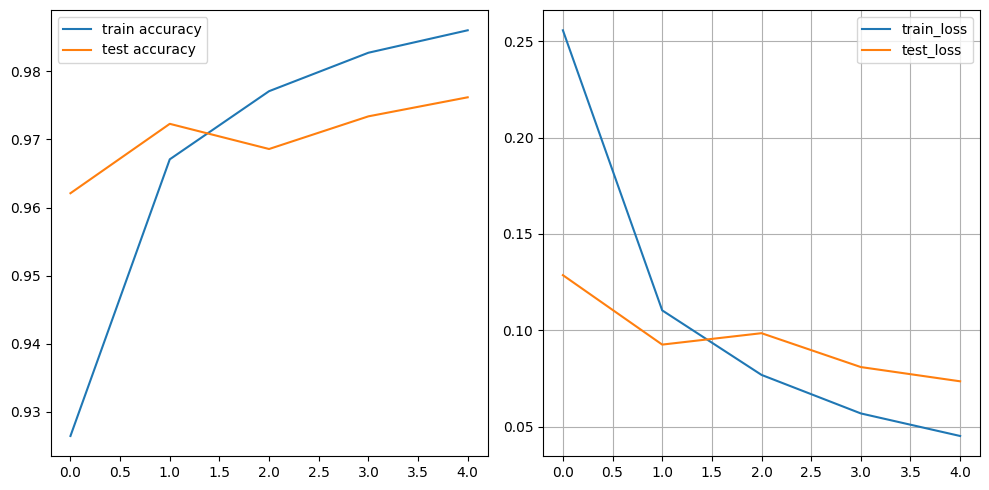

In [ ]:
show_progress(history.history)

313/313 [==============================] - 1s 2ms/step


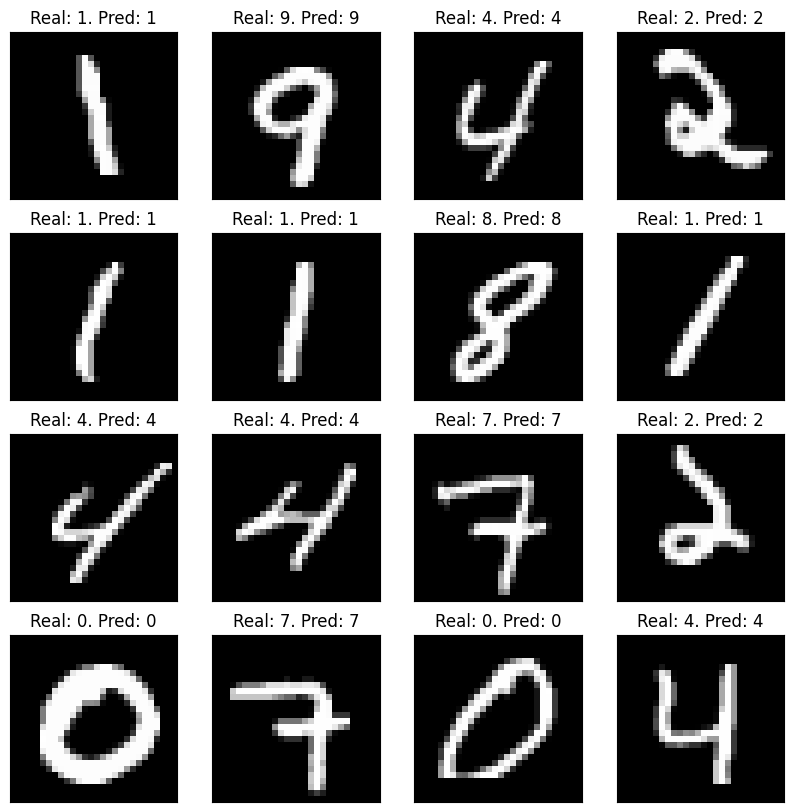

In [ ]:
predicted_labels = restored_model.predict(x_test)
idxs = np.random.choice(np.arange(len(x_test)), 16, replace=False)
show_mnist(x_test[idxs].reshape((-1, 28, 28)), y_test[idxs], np.array([np.argmax(x)for x in predicted_labels[idxs]]))